# Distinguish Your Own Digits (DYOD)
> In this we are going to write a classifier that distinguishes between the number 3 and number 8. Also we will be comparing our neural network to the simple logistic regression model

- badges: true
- author: Prasasti Choudhury

In [1]:
#importing the necessary libraries
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
#this line can be commented out if already installed
!pip install mnist 

## Preparing the Data

In [3]:
import mnist

In [4]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [5]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [6]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [7]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


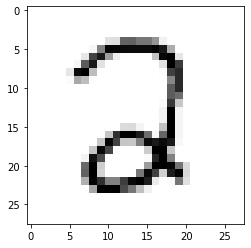

In [8]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [9]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pizel values in the 0 to 1 range

In [10]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [11]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [12]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [13]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [14]:
#Importing the Kudzu libraries that was provided 
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback, ClfCallback
from kudzu.model import Model
from kudzu.loss import MSE
from kudzu.optim import GD
from kudzu.layer import Affine, Sigmoid, Relu
from kudzu.train import Learner

In [15]:
#Using the following configuration to set up the model for training
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 200
config.bs = 50

In [16]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

In [17]:
#Initialising the model
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]
model = Model(layers)

xavier
xavier
xavier
xavier


In [18]:
learner = Learner(loss, model, opt, config.num_epochs)
#calling our modified ClfCallback function in the callbacks.py file
acc = ClfCallback(learner, config.bs, X_train, X_test, y_train.reshape(-1,1), y_test.reshape(-1,1))
learner.set_callbacks([acc])

#### Getting the Epochs and losses as well as the train and test accuracies

In [19]:
learner.train_loop(dl)

Epoch 0 Loss 0.2503608611641938
Train Accuracy 0.629277249207144 Test Accuracy 0.6179435483870968
Epoch 10 Loss 0.08674576363528387
Train Accuracy 0.9187948589550993 Test Accuracy 0.9254032258064516
Epoch 20 Loss 0.05445543360785358
Train Accuracy 0.9420797863461859 Test Accuracy 0.9511088709677419
Epoch 30 Loss 0.042940270344381644
Train Accuracy 0.9526790185277917 Test Accuracy 0.9576612903225806
Epoch 40 Loss 0.037191373402872235
Train Accuracy 0.957603071273577 Test Accuracy 0.9616935483870968
Epoch 50 Loss 0.03365655844497594
Train Accuracy 0.9611083291604072 Test Accuracy 0.9637096774193549
Epoch 60 Loss 0.031226793573225033
Train Accuracy 0.9638624603572025 Test Accuracy 0.9667338709677419
Epoch 70 Loss 0.02938020165613231
Train Accuracy 0.9659489233850777 Test Accuracy 0.9682459677419355
Epoch 80 Loss 0.02790080914026413
Train Accuracy 0.9677015523284928 Test Accuracy 0.9707661290322581
Epoch 90 Loss 0.02666868087329567
Train Accuracy 0.9692872642296778 Test Accuracy 0.97076612

0.03358350741294143

#### Plot for the train and test accuracies for the model

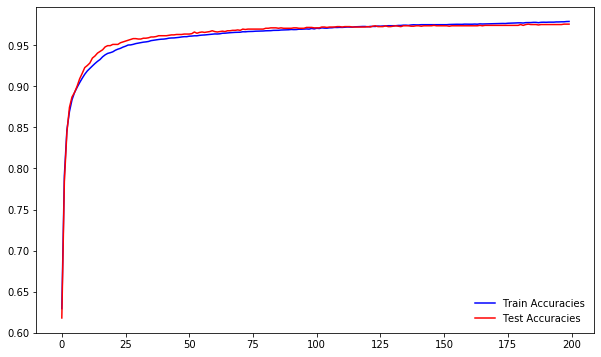

In [20]:
plt.figure(figsize= (10,6))
plt.plot(acc.accuracies, 'b-', label = 'Train Accuracies')
plt.plot(acc.val_accuracies, 'r-', label = 'Test Accuracies')
plt.legend(frameon=False, loc='lower right')
plt.show()

##### The above plot shows overfitting of data as the test accuracies comes below the train accuracies.

### Plotting of the two-dimensional output before the last Affine with Probability Contours
   (hints taken from the TA session videos and Office hour videos)

In [35]:
#taking the model before the last affine where we get the two-dimensional output
model_plot = Model(layers[:-2])
plot_data =  model_plot(X_test)

In [60]:
#function to plot the data
def plotdata(x, y):
    plt.plot(x[y[:,0] == 1, 0], x[y[:,0] == 1, 1], 'ro', label = 'image 3', alpha= 0.1)
    plt.plot(x[y[:,0] == 0, 0], x[y[:,0] == 0, 1], 'bx', label = 'image 8', alpha= 0.15)
    plt.legend(frameon=False, loc='upper right')

##### Calculating the Probability contours

In [49]:
#Inorder to get the probability the last two layers(Logits followed ) are needed to create a model
prob_model = Model(layers[-2: ])

In [62]:
#creating the xx and yy as arrays with 100 rows and 100 columns
xgrid = np.linspace(-8, 8, 100)
ygrid = np.linspace(-5, 3, 100)
xx, yy = np.meshgrid(xgrid, ygrid)

In [63]:
#making both xx and yy as single dimensional arrays and then stacking them vertically and transposing to get the array with 10000 rows and 2 columns
X = np.vstack((np.ravel(xx), np.ravel(yy))).T

In [64]:
#The above data with 10000 rows and 2 columns needs to be fed to the probability model that we created to get the probability contours
prob_contours = prob_model(X).reshape(100,100)
prob_contours.shape

(100, 100)

<a list of 6 text.Text objects>

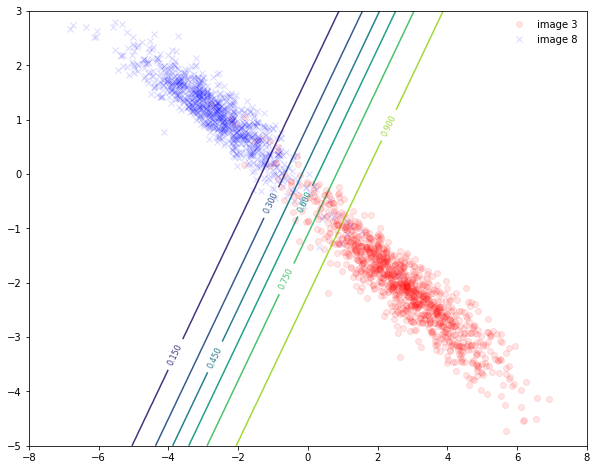

In [71]:
# Plotting the points with the probability contours
plt.figure(figsize = (10,8))
plotdata(plot_data, y_test.reshape(-1,1))
contours = plt.contour(xx, yy, prob_contours)
plt.clabel(contours, inline=True, fontsize= 8)

### Comparing our Neural Network model with the simple Logistic Regression model

In [73]:
#creating the model for the logistic regression consisting of an Affine and  a Sigmoid layer
layers_logistic = [Affine("logits", 784, 1), Sigmoid("sigmoid")] 
logistic_model = Model(layers_logistic)

xavier


In [75]:
learner_l = Learner(loss, logistic_model, opt, config.num_epochs)
#calling our modified ClfCallback function in the callbacks.py file
acc_l = ClfCallback(learner_l, config.bs, X_train, X_test, y_train.reshape(-1,1), y_test.reshape(-1,1))
learner_l.set_callbacks([acc_l])

In [76]:
learner_l.train_loop(dl)

Epoch 0 Loss 0.2367562360959559
Train Accuracy 0.7121515606743448 Test Accuracy 0.7358870967741935
Epoch 10 Loss 0.10001866861793711
Train Accuracy 0.9157903521949591 Test Accuracy 0.9309475806451613
Epoch 20 Loss 0.07784273876847055
Train Accuracy 0.928225671841095 Test Accuracy 0.9410282258064516
Epoch 30 Loss 0.0675107125088896
Train Accuracy 0.9352361876147555 Test Accuracy 0.9506048387096774
Epoch 40 Loss 0.061226968805843864
Train Accuracy 0.9404940744450009 Test Accuracy 0.9551411290322581
Epoch 50 Loss 0.056905649618846574
Train Accuracy 0.9442497078951761 Test Accuracy 0.9571572580645161
Epoch 60 Loss 0.05370901617144848
Train Accuracy 0.9457519612752462 Test Accuracy 0.9576612903225806
Epoch 70 Loss 0.05122610221853336
Train Accuracy 0.9480887998664663 Test Accuracy 0.9581653225806451
Epoch 80 Loss 0.04922616131246544
Train Accuracy 0.9502587214154565 Test Accuracy 0.9596774193548387
Epoch 90 Loss 0.0475721553814584
Train Accuracy 0.9512602236688366 Test Accuracy 0.9616935483

0.013997288515574158

##### Plotting our Neural Network Model and Logistic Regression model

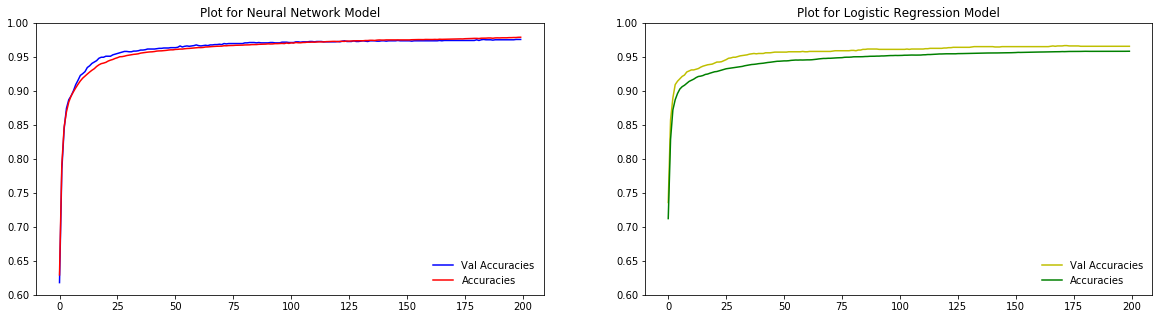

In [82]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(acc.val_accuracies, 'b-', label = "Val Accuracies")
plt.plot(acc.accuracies, 'r-', label = "Accuracies")
plt.title("Plot for Neural Network Model")
plt.ylim(0.6,1)
plt.legend(frameon=False, loc='lower right')

plt.subplot(1,2,2)
plt.plot(acc_l.val_accuracies, 'y-', label = "Val Accuracies")
plt.plot(acc_l.accuracies, 'g-', label = "Accuracies")
plt.title("Plot for Logistic Regression Model")
plt.ylim(0.6,1)
plt.legend(frameon=False, loc='lower right')


##### By comparing the above two graphs it can be seen that our neural network model has better accuracy than the logistic regression model. But in our neural network model overfitting is an issue.  